In [120]:
#importing the dependencies 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv('data1.csv',sep=';')

In [122]:
df.head(5)

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [123]:
df.shape

(3333, 20)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [125]:
print('From the dataset we can observe that there are no null values ')

From the dataset we can observe that there are no null values 


In [126]:
print("Now i will be changing datatypes ")

Now i will be changing datatypes 


In [127]:
df['location code'].unique()

array([415, 408, 510], dtype=int64)

In [128]:
df['location code']=df['location code'].astype(str)

In [129]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [130]:
def list_columns(df): 
  '''
  Input: a dataframe 
  Output: list of categorical columns and numerical columns 
  '''
  cat_cols = ['categorical']
  num_cols = ['numerical']

  for col in df.columns:
    if df[col].dtype == 'object':
      cat_cols.append(col)
    else:
      num_cols.append(col)
  
  return (cat_cols, num_cols)

In [131]:
list_columns(df)

(['categorical',
  'location code',
  'credit card info save',
  'push status',
  'avg order value',
  'discount rate per visited products',
  'product detail view per app session',
  'add to cart per session'],
 ['numerical',
  'account length',
  'user id',
  'add to wishlist',
  'desktop sessions',
  'app sessions',
  'desktop transactions',
  'total product detail views',
  'session duration',
  'promotion clicks',
  'sale product views',
  'app transactions',
  'customer service calls',
  'churn'])

In [132]:
df['credit card info save'].unique()

array(['no', 'yes'], dtype=object)

In [133]:
df['credit card info save']=df['credit card info save'].map({'yes':1,'no':0})

In [134]:
df['push status']=df['push status'].map({'yes':1,'no':0})

In [135]:
df['avg order value']=df['avg order value'].str.replace(",",'.').astype(float)

In [136]:
df['avg order value']

0       244.7
1       254.4
2       162.6
3       196.9
4       186.9
        ...  
3328    279.1
3329    191.3
3330    191.9
3331    139.2
3332    241.4
Name: avg order value, Length: 3333, dtype: float64

In [137]:
##df['avg order value']=df['avg order value'].str.replace(",",'.').astype(float)
df['discount rate per visited products']=df['discount rate per visited products'].str.replace(",",'.').astype(float)
df['product detail view per app session']=df['product detail view per app session'].str.replace(",",'.').astype(float)
df['add to cart per session']=df['add to cart per session'].str.replace(",",'.').astype(float)

In [138]:
df_cat=pd.get_dummies(df['location code'])

In [139]:
df.drop(columns=['user id'],inplace=True)

In [140]:
df_m=pd.concat([df,df_cat],axis=1)

In [141]:
df_m

,account length,location code,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,...,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn,408,415,510
0,128,415,0,1,25,265,45,17,110,197,...,91,11.01,10.0,3,2.70,1,0,0,1,0
1,107,415,0,1,26,162,27,17,123,196,...,103,11.45,13.7,3,3.70,1,0,0,1,0
2,137,415,0,0,0,243,41,10,114,121,...,104,7.32,12.2,5,3.29,0,0,0,1,0
3,84,408,1,0,0,299,51,5,71,62,...,89,8.86,6.6,7,1.78,2,0,1,0,0
4,75,415,1,0,0,167,28,13,113,148,...,121,8.41,10.1,3,2.73,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156,27,18,77,216,...,83,12.56,9.9,6,2.67,2,0,0,1,0
3329,68,415,0,0,0,231,39,13,57,153,...,123,8.61,9.6,4,2.59,3,0,0,1,0
3330,28,510,0,0,0,181,31,25,109,289,...,91,8.64,14.1,6,3.81,2,0,0,0,1
3331,184,510,1,0,0,214,36,14,105,160,...,137,6.26,5.0,10,1.35,2,0,0,0,1


# Performing Eda on the dataset 

# Univariate Analysis

0    2850
1     483
Name: churn, dtype: int64

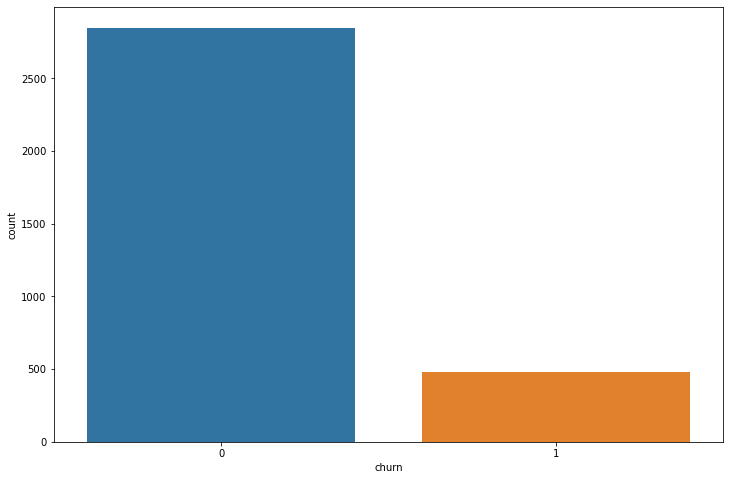

In [142]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
sns.countplot(df['churn'])
df['churn'].value_counts()

<AxesSubplot:xlabel='app sessions', ylabel='Density'>

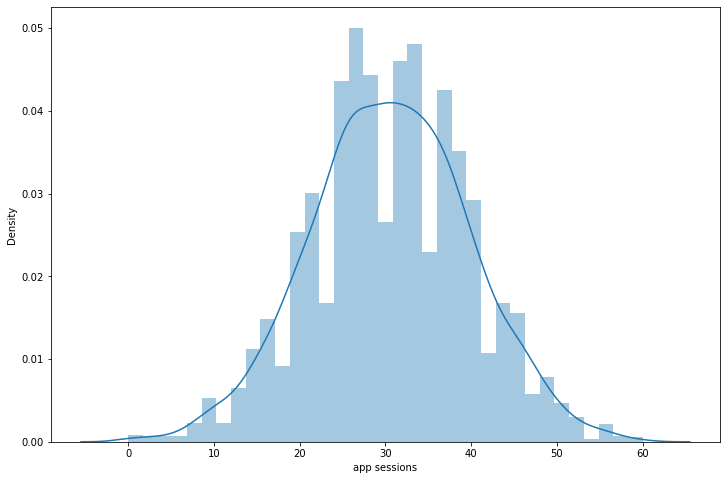

In [143]:
plt.figure(figsize=(12,8))
sns.distplot(df['app sessions'])


<AxesSubplot:xlabel='desktop transactions', ylabel='Density'>

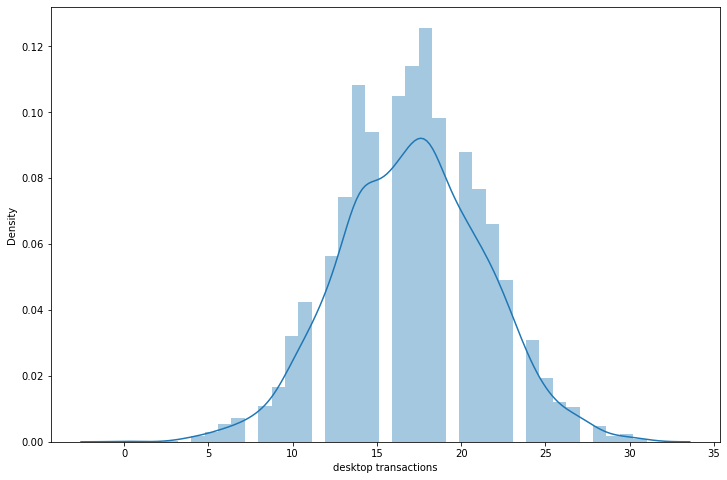

In [144]:
plt.figure(figsize=(12,8))
sns.distplot(df['desktop transactions'])

<AxesSubplot:xlabel='total product detail views', ylabel='Density'>

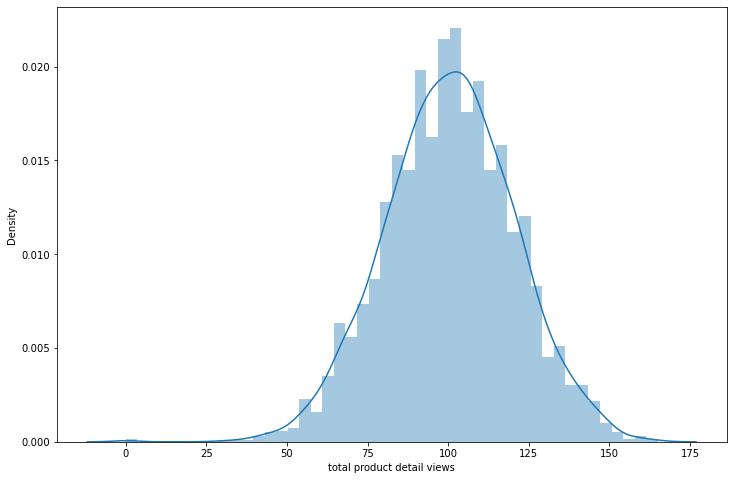

In [145]:
plt.figure(figsize=(12,8))
sns.distplot(df['total product detail views'])

<AxesSubplot:xlabel='discount rate per visited products', ylabel='Density'>

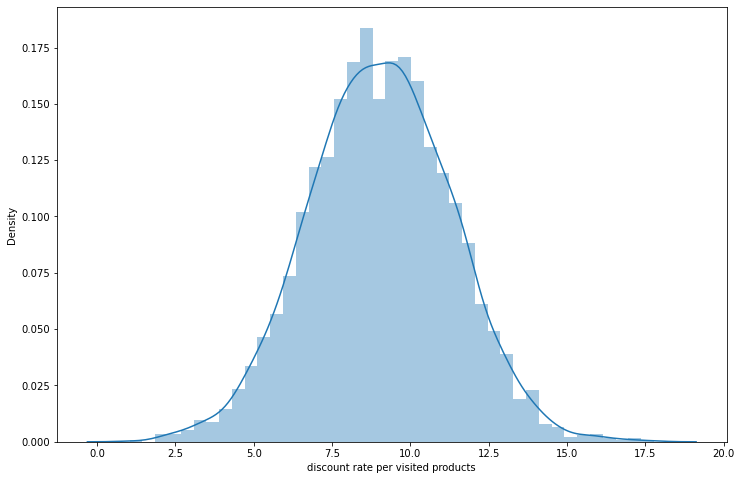

In [146]:
plt.figure(figsize=(12,8))
sns.distplot(df['discount rate per visited products'])

<AxesSubplot:xlabel='add to cart per session', ylabel='Density'>

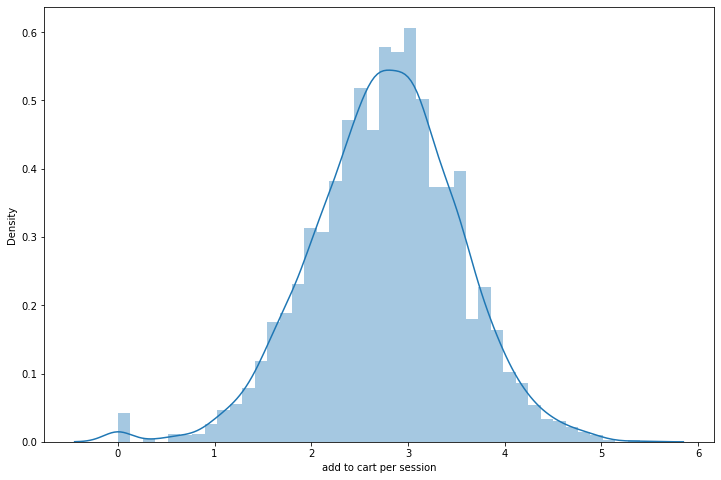

In [147]:
plt.figure(figsize=(12,8))
sns.distplot(df['add to cart per session'])

<AxesSubplot:xlabel='session duration', ylabel='Density'>

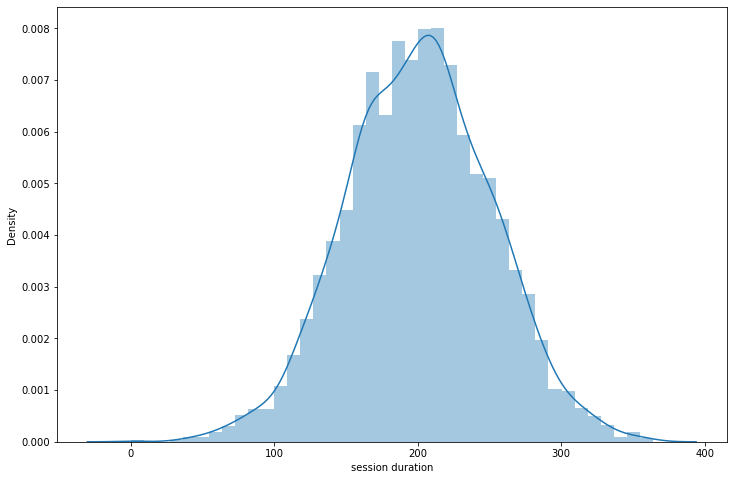

In [148]:
plt.figure(figsize=(12,8))
sns.distplot(df['session duration'])

<AxesSubplot:xlabel='desktop sessions', ylabel='Density'>

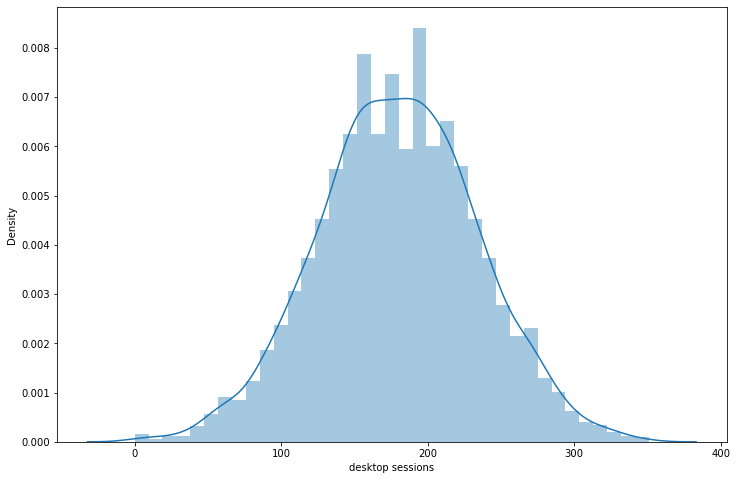

In [149]:
plt.figure(figsize=(12,8))
sns.distplot(df['desktop sessions'])

# Bivariate Analysis

In [150]:
df_m.columns

Index(['account length', 'location code', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn', '408',
       '415', '510'],
      dtype='object')

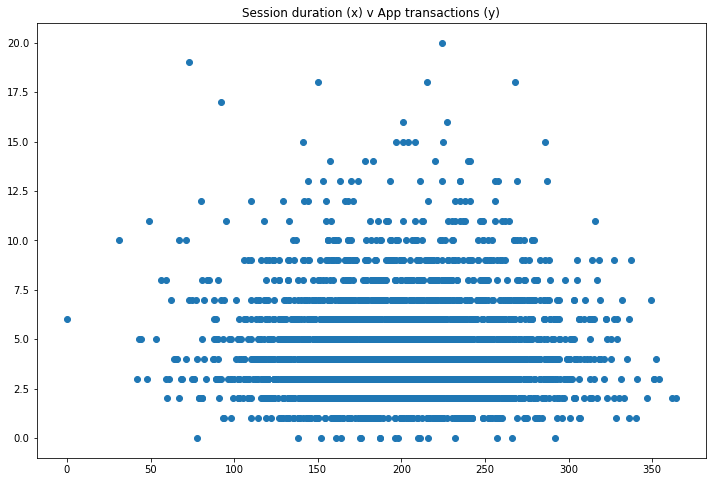

In [151]:
plt.figure(figsize=(12,8))
plt.scatter(x='session duration',y='app transactions',data=df_m)
plt.title("Session duration (x) v App transactions (y)" )

# show the plot
plt.show()



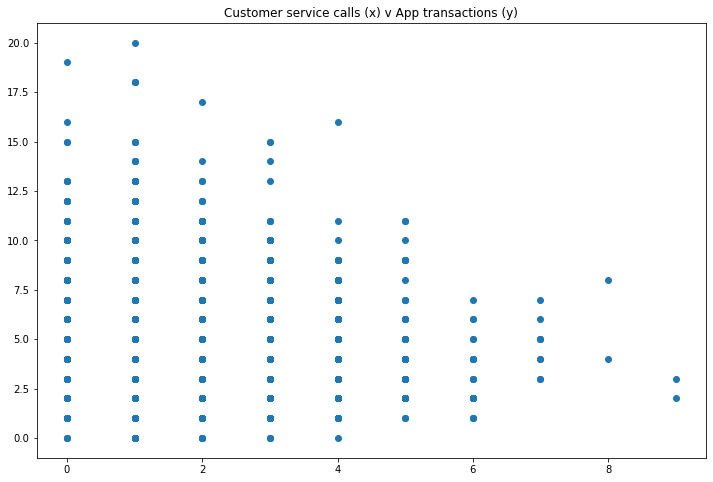

In [152]:
plt.figure(figsize=(12,8))
plt.scatter(x='customer service calls',y='app transactions',data=df_m)
plt.title("Customer service calls (x) v App transactions (y)" )
plt.show()


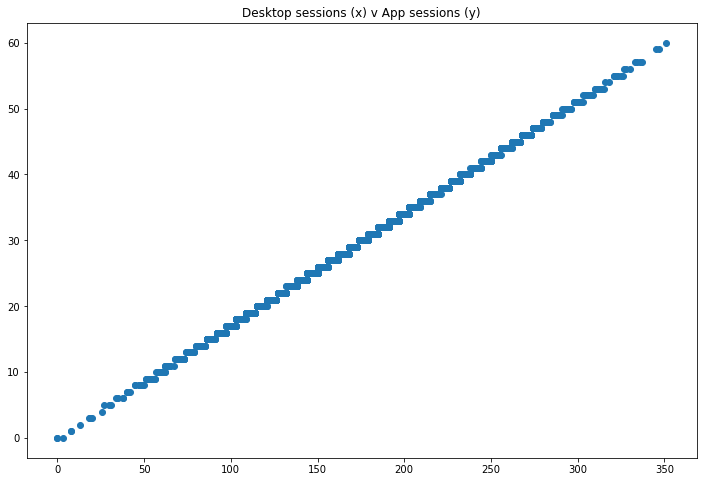

In [153]:
plt.figure(figsize=(12,8))
plt.scatter(x='desktop sessions',y='app sessions',data=df_m)
plt.title("Desktop sessions (x) v App sessions (y)" )
plt.show()


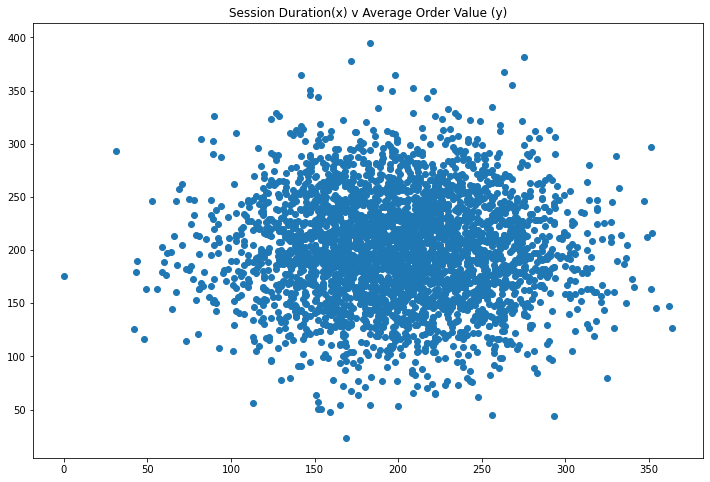

In [154]:
plt.figure(figsize=(12,8))
plt.scatter(x='session duration',y='avg order value',data=df_m)
plt.title("Session Duration(x) v Average Order Value (y)" )
plt.show()


# Calculating Multicollinearity

<AxesSubplot:>

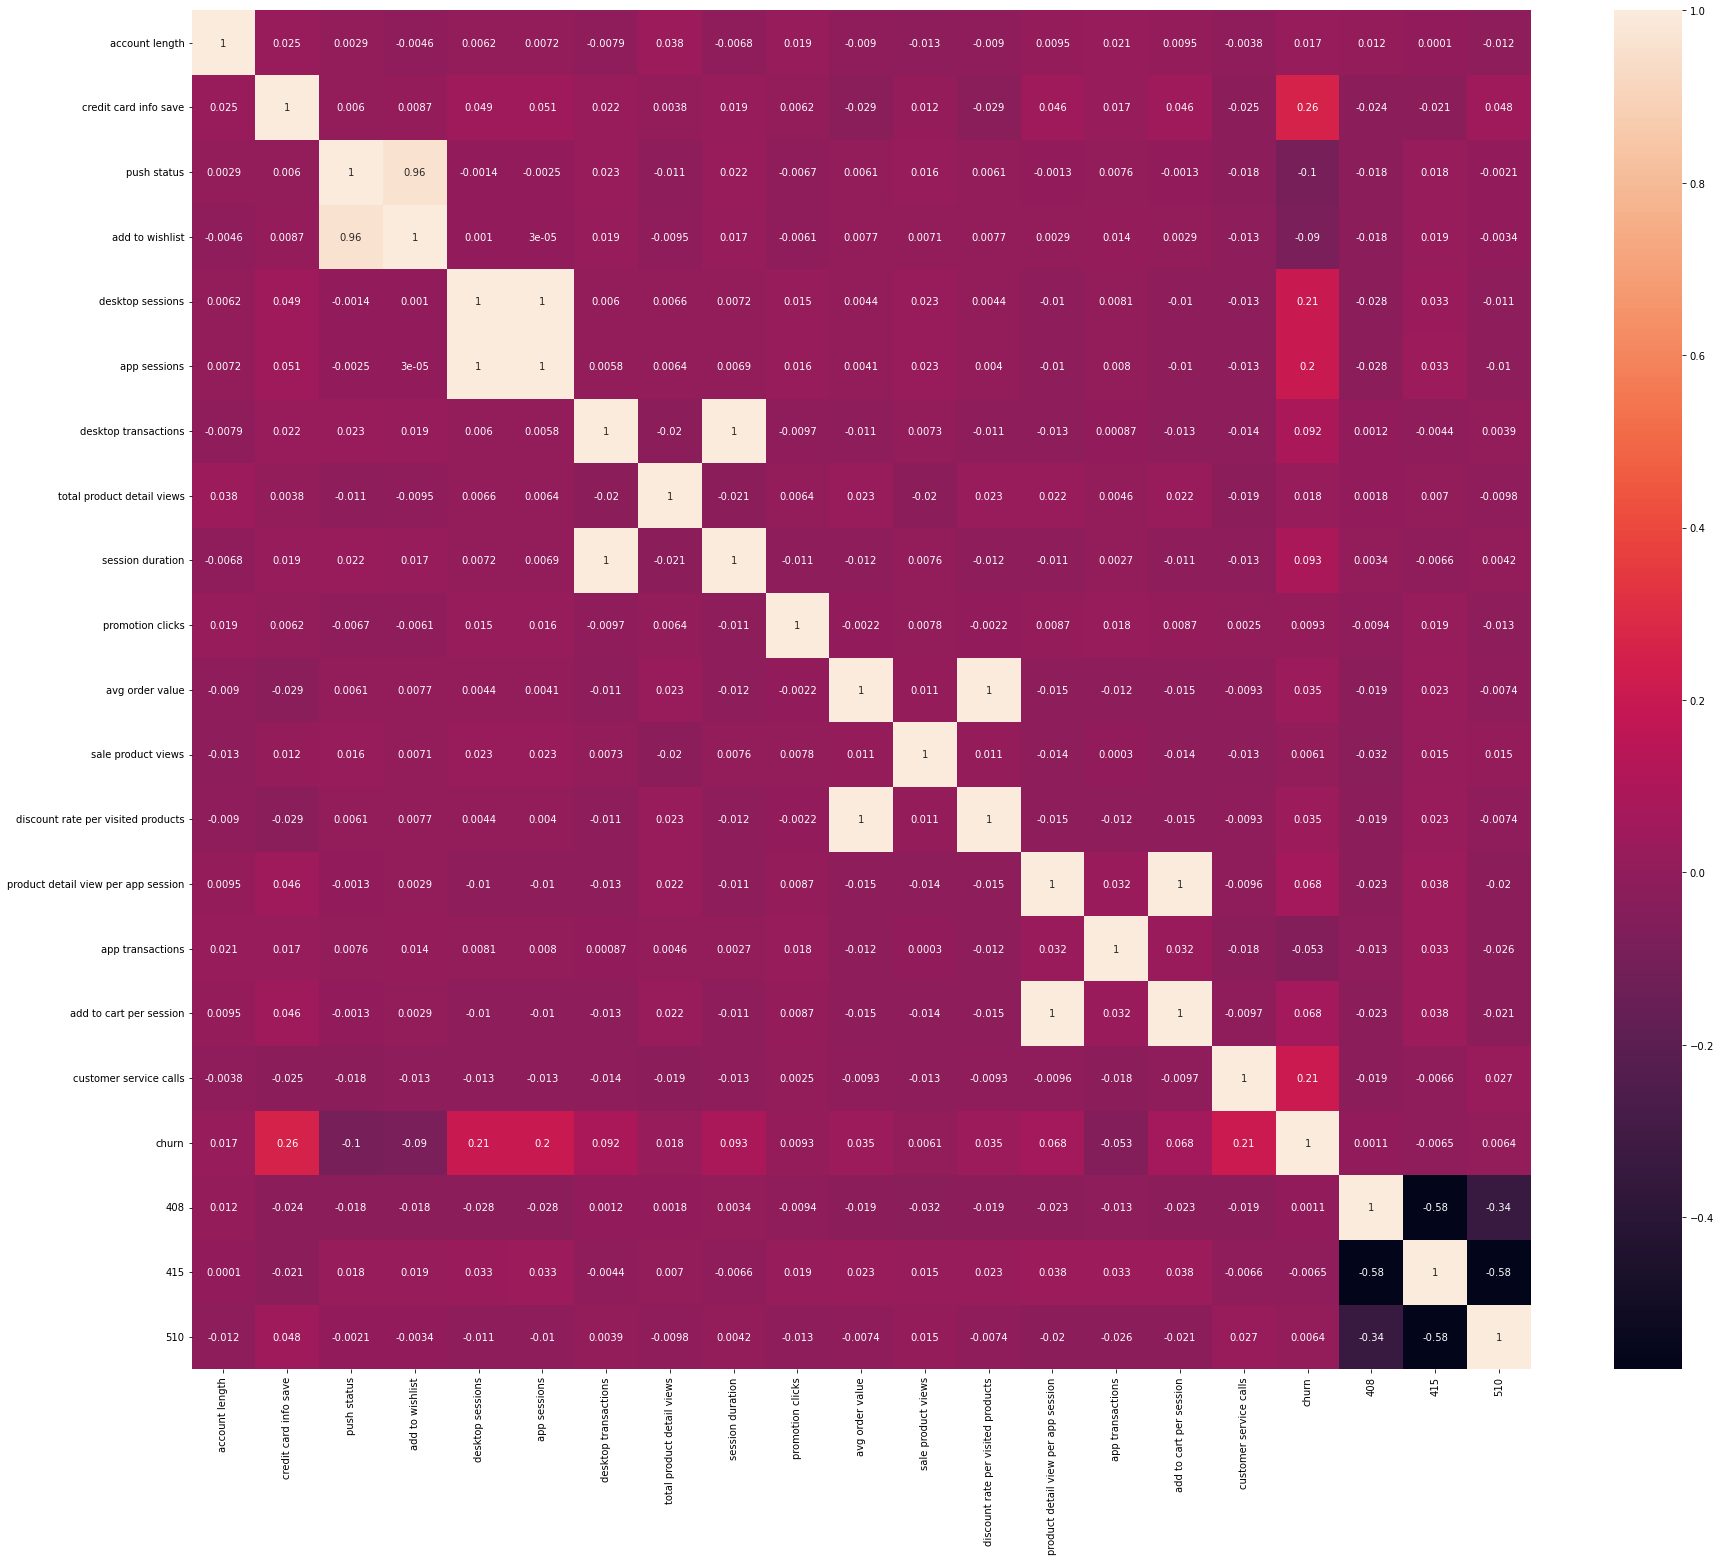

In [155]:
plt.figure(figsize=(30,25))
sns.heatmap(df_m.corr(),annot=True)

In [156]:
df_numerical=df.select_dtypes(include=np.number)

In [157]:
df_numerical.dtypes

account length                           int64
credit card info save                    int64
push status                              int64
add to wishlist                          int64
desktop sessions                         int64
app sessions                             int64
desktop transactions                     int64
total product detail views               int64
session duration                         int64
promotion clicks                         int64
avg order value                        float64
sale product views                       int64
discount rate per visited products     float64
product detail view per app session    float64
app transactions                         int64
add to cart per session                float64
customer service calls                   int64
churn                                    int64
dtype: object

In [158]:
def find_correlated_columns(data, threshold):
  # create an empty list to store the correlated columns
  correlated_columns = []

  # compute the correlation matrix
  correlation_matrix = data.corr()

  # iterate over each column in the correlation matrix
  for col in correlation_matrix:
    # get the correlation values for the column
    correlation_values = correlation_matrix[col].drop(col)

    # iterate over each value in the correlation values
    for value in correlation_values:
      # check if the absolute value of the correlation is above the threshold
      if abs(value) > threshold:
        # add the column name to the list of correlated columns
        correlated_columns.append(col)
        break

  # return the list of correlated columns
  return correlated_columns

In [159]:
find_correlated_columns(df_numerical, 0.9)

['push status',
 'add to wishlist',
 'desktop sessions',
 'app sessions',
 'desktop transactions',
 'session duration',
 'avg order value',
 'discount rate per visited products',
 'product detail view per app session',
 'add to cart per session']

In [160]:
cor_df=df[['push status',
 'add to wishlist',
 'desktop sessions',
 'app sessions',
 'desktop transactions',
 'session duration',
 'avg order value',
 'discount rate per visited products',
 'product detail view per app session',
 'add to cart per session']]

In [161]:
cor_df

,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,session duration,avg order value,discount rate per visited products,product detail view per app session,add to cart per session
0,1,25,265,45,17,197,244.7,11.01,10.0,2.70
1,1,26,162,27,17,196,254.4,11.45,13.7,3.70
2,0,0,243,41,10,121,162.6,7.32,12.2,3.29
3,0,0,299,51,5,62,196.9,8.86,6.6,1.78
4,0,0,167,28,13,148,186.9,8.41,10.1,2.73
...,...,...,...,...,...,...,...,...,...,...
3328,1,36,156,27,18,216,279.1,12.56,9.9,2.67
3329,0,0,231,39,13,153,191.3,8.61,9.6,2.59
3330,0,0,181,31,25,289,191.9,8.64,14.1,3.81
3331,0,0,214,36,14,160,139.2,6.26,5.0,1.35


# So above is a list of all the columns that are highly correlated with each other, Removing these columns

In [173]:
##df_m.drop(columns=['add to cart per session'],inplace=True)

In [185]:
df_m

,account length,location code,credit card info save,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,app transactions,customer service calls,churn,408,415,510
0,128,415,0,265,45,17,110,197,87,244.7,91,3,1,0,0,1,0
1,107,415,0,162,27,17,123,196,103,254.4,103,3,1,0,0,1,0
2,137,415,0,243,41,10,114,121,110,162.6,104,5,0,0,0,1,0
3,84,408,1,299,51,5,71,62,88,196.9,89,7,2,0,1,0,0
4,75,415,1,167,28,13,113,148,122,186.9,121,3,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,156,27,18,77,216,126,279.1,83,6,2,0,0,1,0
3329,68,415,0,231,39,13,57,153,55,191.3,123,4,3,0,0,1,0
3330,28,510,0,181,31,25,109,289,58,191.9,91,6,2,0,0,0,1
3331,184,510,1,214,36,14,105,160,84,139.2,137,10,2,0,0,0,1


# Performing Train Test Split

In [236]:
y=df_m['churn']
X=df_m.drop(columns='churn')

In [237]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [238]:
X

,account length,location code,credit card info save,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,app transactions,customer service calls,408,415,510
0,128,415,0,265,45,17,110,197,87,244.7,91,3,1,0,1,0
1,107,415,0,162,27,17,123,196,103,254.4,103,3,1,0,1,0
2,137,415,0,243,41,10,114,121,110,162.6,104,5,0,0,1,0
3,84,408,1,299,51,5,71,62,88,196.9,89,7,2,1,0,0
4,75,415,1,167,28,13,113,148,122,186.9,121,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,156,27,18,77,216,126,279.1,83,6,2,0,1,0
3329,68,415,0,231,39,13,57,153,55,191.3,123,4,3,0,1,0
3330,28,510,0,181,31,25,109,289,58,191.9,91,6,2,0,0,1
3331,184,510,1,214,36,14,105,160,84,139.2,137,10,2,0,0,1


In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
print ("The shape of the training set looks like",X_train.shape)

The shape of the training set looks like (2666, 16)


In [196]:
print ("The shape of the testing set looks like",X_test.shape)

The shape of the testing set looks like (667, 16)


In [198]:
print ("The shape of the training set looks like",y_train.shape)

The shape of the training set looks like (2666,)


In [197]:
print ("The shape of the testing set looks like",y_test.shape)

The shape of the testing set looks like (667,)


# Performing Feature Scaling

In [200]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data using the scaler
xtrain_scaled = scaler.transform(X_train)
xtest_scaled = scaler.transform(X_test)

# Building the Model 

In [202]:
#import necessary modules
def Random_Forest_Classification(xtrain_scaled, y_tain):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    clf = RandomForestClassifier(n_estimators=100, random_state=0)
    clf.fit(X, y)
    preds=clf.predict(X_test)
    acc=accuracy_score(y_test,preds)
    return acc
    return clf


In [203]:
Acc=Random_Forest_Classification(X_train, y_train)

In [204]:
print ("Model accuracy for the Base model is : ", round(Acc,2)*100)

Model accuracy for the Base model is :  100.0


# Clearly the model is overfitting the data 

# # Performing Hyper Parameter Tuning 

In [205]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 3, n_iter = 10, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Score: {}".format(grid_search.best_score_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.4s


In [206]:
from sklearn.metrics import accuracy_score
clf1 = RandomForestClassifier(n_estimators= 200, min_samples_split= 8, min_samples_leaf= 5, max_features= 3, max_depth= 90, bootstrap= True)
clf1.fit(X_train, y_train)
preds=clf1.predict(X_test)
acc=accuracy_score(y_test,preds)

In [207]:
print ("Model accuracy for the Tuned model is : ", round(acc,2)*100)

Model accuracy for the Tuned model is :  91.0


Text(0.5, 1.1, 'Confusion matrix')

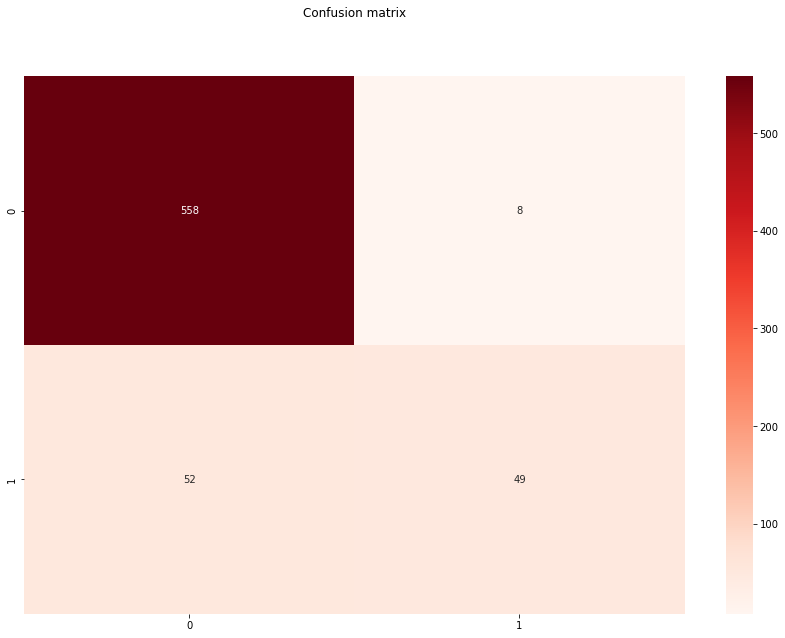

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix

true_labels = y_test
predicted_labels = preds

conf_mat = confusion_matrix(true_labels, predicted_labels)

classes=[0,1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True,fmt='g',cmap='Reds')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)


In [214]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, roc_auc_score

y_true = y_test
y_pred = preds

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate sensitivity
sensitivity = roc_auc_score(y_true, y_pred)

print("Recall: ", round(recall,2))
print("Precision: ", round(precision,2))
print("Accuracy: ", round(accuracy,2))
print("Sensitivity: ", round(sensitivity,2))

Recall:  0.49
Precision:  0.86
Accuracy:  0.91
Sensitivity:  0.74


In [229]:
print(clf1.feature_importances_)

[0.03633846 0.00597839 0.09642028 0.18721561 0.15101474 0.05229704
 0.03959091 0.07748989 0.03641274 0.04738756 0.03902345 0.04443434
 0.17299914 0.00281097 0.00630459 0.00428189]


In [252]:
# get the feature importances from the model
importances = clf1.feature_importances_

# sort the importances in descending order
indices = np.argsort(importances)[::-1]

# create a list of feature names
feature_names = [X.columns[i] for i in indices]

# create a bar plot of the feature importances
plt.figure(figsize=(25,15),dpi=500)
plt.bar(range(X.shape[1]), importances[indices],color='red')
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.show()

# From this graph we can clearly see that features called Desktop sessions , customer service calls and app sessions seem to be the top 3 Features when it comes to deciding weather the customer is going to stay or not. i.e in predicting churn rate.